--- 
authors: Mehraj en John
updated: december 3, 2025    
---
# Druksensor ijken en maken van een $pV$-diagram

## Introductie

In de experimentele natuurkunde was het lang geleden gelukt om de krachten tussen ladingen te bestuderen zonder dat bekend was hoe groot die ladingen nu precies waren. Men laadde een metalen bol op en hield deze tegen een andere metalen bol van hetzelfde materiaal. Men redeneerde dat de ladingen op de bollen gelijk waren, omdat ze van hetzelfde materiaal waren. Vervolgens plaatste men de bollen in een vacuüm en mat men de krachten tussen de bollen met een zeer gevoelige balans. Op deze manier kon men de krachten tussen de ladingen bestuderen zonder de absolute waarde van de ladingen te kennen. Dit trucje kon herhaald worden met andere bollen waarna een kwantiatieve beschrijving van de krachten tussen ladingen mogelijk werd.

Een soortgelijke meettechniek gaan we gebruiken om een druksensor te ijken. Van de sensor zijn wel wat dingen bekend, maar omdat de spanning van de Arduino niet overeenkomstig is met de gewenste spanning, zouden we deze moeten ijken. We weten dat de sensor lineair is, dus als we twee punten weten, kunnen we de rest van de curve bepalen. Nog beter zou het zijn om drie punten te nemen en zo ook het lineaire karakter van de sensor te bevestigen.

## Theorie

Een injectiespuit met een maximaal volume van 50 mL is gevuld met lucht. De spuit kan aan een kant afgesloten worden met een tube die verbonden is met een druksensor die de gasdruk meet. Door de zuiger van de spuit in te drukken, wordt het volume verkleind en de druk verhoogd. Wanneer we de druk langzaam in drukken verwachten we dat de druk in de spuit volgens de wet van Boyle toeneemt:

$$
    P_1 V_1 = P_2 V_2 
$$ (eq:Boyle)

Omdat de gemeten spanning van de druksensor lineair afhankelijk is van de druk, kan de druk uitgedrukt worden als:

$$
    P = a U + b
$$ (eq:lineair)



## Methode en materialen

```{note} Software
De Arduino code staat al op de Arduino's. Als je de Arduino aansluit op je computer en de Arduino IDE opent, kan je de seriële monitor openen om de gemeten spanning te zien.
```

Je maakt gebruik van een Arduino. Daarvoor heb je de juiste IDE nodig. Het programma staat al op de Arduino's in het lokaal. Zodra je de Arduino aansluit op je computer zal de Arduino gaan meten, maar zijn de metingen nog niet zichtbaar. Je moet de Arduino op `Arduino MKR Zero` zetten. Dan wordt nog wel een driver geinstalleerd. 

Controleer of de Arduino herkend wordt door op `tools` -> `port` te klikken, daar staat de com poort van de Arduino. Open vervolgens de seriële monitor (het vergrootglas rechtsboven in de IDE) om de gemeten spanning te zien.

```{warning}
De twee stekkertjes hoef je NIET met elkaar te verbinden. Dit is alleen voor een meting in de brandblusser.
``` 

```{code} C++
int drukpin = A1;

void setup() {
  pinMode(A1,INPUT);
  Serial.begin(9600);
}

void loop() {
  Serial.println(analogRead(drukpin));
  delay(100);
}
```

### Deel 1
Stel de injectiespuit in op 40 mL en sluit de spuit aan op de druksensor door middel van een zo klein mogelijke tube. Meet de spanning van de druksensor met de Arduino en noteer deze waarde als $U_1$. Druk vervolgens de zuiger langzaam in tot 20 mL en meet opnieuw de spanning van de druksensor, noteer deze waarde als $U_2$. Herhaal dit voor volumes van 10 mL. 

1. Leg uit waarom een zo klein mogelijke tube gebruikt moet worden.
2. Welke waarde hoort bij de gasdruk bij 40 mL? Zoek deze waarde op.
3. Welke waarden horen bij de gasdruk bij 20 en 10 mL? 
4. Gebruik de drie punten om de waarden van $a$ en $b$ in {numref}`vergelijking {number} <eq:lineair>` te bepalen en controleer of de sensor inderdaad lineair is door de waarden te plotten.

### Deel 2
Vervang daarbij de kleine tube voor een langere en bepaal het onbekende volume van de tube met een volgende meetserie waarbij je de druk en het volume bepaald. Zorg ervoor dat ook drukken onder de 1 atm gemeten worden. 
```{tip}
Maak gebruik van een systematische fout in het volume om het volume van de tube te vinden.
```


$$Antwoorden $$
### Deel 1
1. Minimalisatie:   De vergelijking van de wet van Boyle in het algemeen geldt voor het totale volume van een gas.  Op de spuit staat een schaalverdeling die het volume van de cilinder($V_{spuit}$) aangeeft. Het werkelijke volume is $V_{totaal} = V_{spuit} + V_{tube}$. Dus als de tube groot is, zal de verhouding niet meer kloppen. Bijvoorbeeld: de spuit van 40 naar 20 mL drukken is dan geen halvering van het totale gasvolume, waardoor de druk niet precies verdubbelt.Een kleine tube minimaliseert systematische fout.


2. De waarde die bij de gasdruk bij 40 mL hoort, is de waarde in de startpositie waarbij de spuit open is geweest naar de buitenlucht (of net is afgesloten). De druk is hier gelijk aan de standaard atmosferische druk ($P_{atm}$).
 $$Waarde: 101.3 kPa (of 1013 hPa / 1 bar)$$

3. Als het volume van de tube verwaarloosd word en de Wet van Boyle aangenomen word als ($P_1 V_1 = P_2 V_2$), dan is:

- Bij 20 mL (volume gehalveerd): De druk verdubbelt $\rightarrow 2 \times 101.3 = \textbf{202.6 kPa}$.


- Bij 10 mL (volume kwart van start): De druk wordt vier keer zo groot $\rightarrow 4 \times 101.3 = \textbf{405.2 kPa}$.


4. Waardes $a$ en $b$ zijn vermeld in resultaat. 

### Deel 2

Om de onbekende volume te berekenen, word gebruikt gemaakt van systematsiche fout. 
- De wet van Boyle krijgt een nieuwe vorm:
$$P \cdot (V_{spuit} + V_{tube}) = C$$

- Omschrijven naar een lineaire vergelijking door $V_{spuit}$ uit te zetten tegen $1/P$:

$$V_{spuit} = C \cdot \frac{1}{P} - V_{tube}$$

$V_{spuit}$ wordt op de y-as gezet en $1/P$ op de x-as. Dit geeft een grafiek met een rechte lijn. Het snijpunt met de y-as (waar $1/P = 0$, oftewel oneindig hoge druk) is $-V_{tube}$.

## Ruwe Data

### Ijken Data:

- Atmospheric pressure ($P_{atm}$) is $101.3 \text{ kPa}$
- $P = aU + b$, hierbij is $U$ de Raw Sensor Value

Volume (V) [mL]
- 40, 20, 10


Theoretical Pressure (P) [kPa]
- 101.3, 202.6, 405.2 

Raw Sensor Value
- 174, 328, 631

### Data (Tube Volume)

- $V_{totaal} = V_{spuit} + V_{tube}$

Syringe Setting (Vsyringe​) [mL] :
- 45,40,35,30,25,20,15,12,10


Raw Sensor Value (Arduino analogRead)
- 158, 172, 191, 215, 248, 293, 360, 422, 478



## Resultaten

--- Resultaten Deel 1 ---
Gevonden relatie: P = 0.6655 * U + -14.97
R-kwadraat (lineariteit): 1.0000
Conclusie: De R^2 is bijna 1, dus de sensor is inderdaad lineair.

--- Resultaten Deel 2 ---
De formule V_spuit = C * (1/P) - V_tube is gefit.
Snijpunt met y-as: -4.87
Berekend volume van de slang (V_tube): 4.87 mL


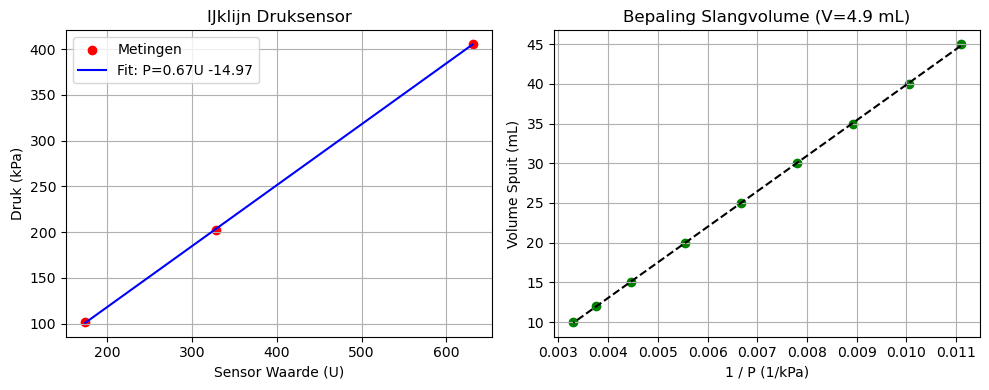

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


# Deel 1: 
vol_cal = np.array([40, 20, 10])
press_theory = np.array([101.3, 202.6, 405.2])
adc_cal = np.array([174, 328, 631])

# Deel 2: Meting met lange slang
vol_meas = np.array([45, 40, 35, 30, 25, 20, 15, 12, 10])
adc_meas = np.array([158, 172, 191, 215, 248, 293, 360, 422, 478])

# --- OPLOSSING VRAAG 4 (IJklijn bepalen) ---
# We zoeken P = a * U + b
# Let op: scipy verwacht (x, y), dus (adc, pressure)
slope, intercept, r_value, p_value, std_err = linregress(adc_cal, press_theory)

a = slope
b = intercept

print(f"--- Resultaten Deel 1 ---")
print(f"Gevonden relatie: P = {a:.4f} * U + {b:.2f}")
print(f"R-kwadraat (lineariteit): {r_value**2:.4f}")
print("Conclusie: De R^2 is bijna 1, dus de sensor is inderdaad lineair.")

# --- OPLOSSING DEEL 2 (Volume bepalen) ---
# Stap 1: Reken de ADC waarden van deel 2 om naar Druk (kPa) met de formule uit deel 1
press_meas_calc = a * adc_meas + b

# Stap 2: Bepaal V_tube
# Theorie: V_spuit = C * (1/P) - V_tube
# Y = V_spuit
# X = 1 / P
x_axis = 1 / press_meas_calc
y_axis = vol_meas

slope_v, intercept_v, r_val_v, _, _ = linregress(x_axis, y_axis)

V_tube_found = -intercept_v

print(f"\n--- Resultaten Deel 2 ---")
print(f"De formule V_spuit = C * (1/P) - V_tube is gefit.")
print(f"Snijpunt met y-as: {intercept_v:.2f}")
print(f"Berekend volume van de slang (V_tube): {V_tube_found:.2f} mL")

plt.figure(figsize=(10, 4))

# Plot 1: IJklijn
plt.subplot(1, 2, 1)
plt.scatter(adc_cal, press_theory, color='red', label='Metingen')
plt.plot(adc_cal, a*adc_cal + b, color='blue', label=f'Fit: P={a:.2f}U {b:.2f}')
plt.xlabel('Sensor Waarde (U)')
plt.ylabel('Druk (kPa)')
plt.title('IJklijn Druksensor')
plt.legend()
plt.grid(True)

# Plot 2: Bepaling V_tube
plt.subplot(1, 2, 2)
plt.scatter(x_axis, y_axis, color='green', label='Metingen')
plt.plot(x_axis, slope_v*x_axis + intercept_v, color='black', linestyle='--')
plt.xlabel('1 / P (1/kPa)')
plt.ylabel('Volume Spuit (mL)')
plt.title(f'Bepaling Slangvolume (V={V_tube_found:.1f} mL)')
plt.grid(True)

plt.tight_layout()
plt.show()

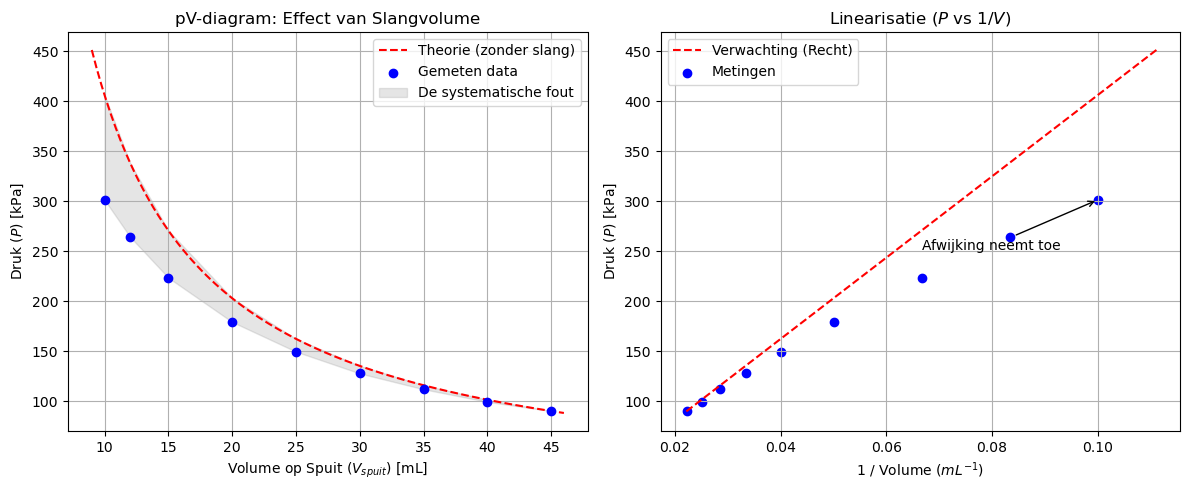

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- DATA OPHALEN (uit eerdere generatie) ---
# We gebruiken de "Deel 2" data: onbekend volume meting
# Hier gebruiken we de berekende druk uit de sensorwaarden (P = aU + b)
# waarden uit vorige stap (afgerond): a = 0.66, b = -14
a_found = 0.66
b_found = -14
adc_meas = np.array([158, 172, 191, 215, 248, 293, 360, 422, 478])
vol_syringe = np.array([45, 40, 35, 30, 25, 20, 15, 12, 10])

# 1. Bereken de gemeten druk
P_measured = a_found * adc_meas + b_found

# 2. Bereken de theoretische lijn (als V_tube = 0 zou zijn)
# We pinnen vast op het startpunt: bij 45 mL was de druk P_measured[0]
# Boyle: P * V = C -> C = P_start * V_start
C_naive = P_measured[0] * vol_syringe[0] 
# Theoretische druk als er GEEN slang was:
P_theory_no_tube = C_naive / vol_syringe

# --- PLOTTEN ---
plt.figure(figsize=(12, 5))

# PLOT 1: pV-diagram
plt.subplot(1, 2, 1)
# De theoretische lijn (Boyle zonder slangfout)
x_smooth = np.linspace(9, 46, 100)
y_smooth = C_naive / x_smooth
plt.plot(x_smooth, y_smooth, 'r--', label='Theorie (zonder slang)')

# De echte metingen
plt.scatter(vol_syringe, P_measured, color='blue', zorder=5, label='Gemeten data')
plt.fill_between(vol_syringe, P_measured, P_theory_no_tube, color='gray', alpha=0.2, label='De systematische fout')

plt.title('pV-diagram: Effect van Slangvolume')
plt.xlabel('Volume op Spuit ($V_{spuit}$) [mL]')
plt.ylabel('Druk ($P$) [kPa]')
plt.legend()
plt.grid(True)

# PLOT 2: Gelineariseerd (P vs 1/V)
plt.subplot(1, 2, 2)
# X-as is nu 1/V
one_over_v = 1 / vol_syringe
one_over_v_smooth = 1 / x_smooth

# Theorie lijn (zou recht door oorsprong moeten zijn)
plt.plot(one_over_v_smooth, (C_naive * one_over_v_smooth), 'r--', label='Verwachting (Recht)')

# Metingen
plt.scatter(one_over_v, P_measured, color='blue', label='Metingen')

# Visuele pijl om de afwijking aan te duiden
plt.annotate('Afwijking neemt toe', 
             xy=(one_over_v[-1], P_measured[-1]), 
             xytext=(one_over_v[-3], P_measured[-1]-50),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.title('Linearisatie ($P$ vs $1/V$)')
plt.xlabel('1 / Volume ($mL^{-1}$)')
plt.ylabel('Druk ($P$) [kPa]')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Interpretatie
### $pV$-diagram (Druk tegen Volume)

In de eerste grafiek is de gemeten druk ($P$) uit gezet tegen het volume van de spuit ($V_{spuit}$).


- Oog inspectie: De meetpunten vormen een kromme lijn die lijkt op een hyperbool (de vorm $y = 1/x$). Dit klopt met de wet van Boyle: als het volume kleiner wordt, wordt de druk groter.


- De afwijking: Als een theoretische lijn word getekent (waarbij het aangenomen wordt dat er géén slang is), zal de meetpunten bij kleine volumes (10 - 15 mL) onder die theoretische lijn liggen.


- Fysische verklaring: De druk stijgt minder hard dan verwachten. Dit komt doordat de lucht minder samenperst word dan de spuit aangeeft. Als de spuit op 10 mL staat, zit er in werkelijkheid nog bijvoorbeeld 4 mL extra lucht in de slang. Het totale volume is dus 14 mL in plaats van 10 mL. Omdat het volume groter is, is de druk lager.
 

### Gelineariseerde grafiek ($V_{spuit}$ tegen $1/P$)


Om de systematische fout (het slangvolume) te vinden, wordt de wet van Boyle herschreven. In plaats van een kromme, word een rechte lijn gemaakt. De formule is:$$V_{spuit} = C \cdot \frac{1}{P} - V_{tube}$$Hierin staat $V_{spuit}$ op de y-as en $1/P$ op de x-as.


- De helling: De lijn is recht. Dit bewijst dat de wet van Boyle ($P \cdot V = \text{constant}$) nog steeds geldt voor het totale gas. De steilheid van de lijn is de constante $C$ (afhankelijk van de hoeveelheid gas en temperatuur).


- Doordat de lijn niet door nul gaat, is het een bewijs dat $V_{spuit}$ niet het enige volume is, maar dat er een constant volume ($V_{tube}$) bij opgeteld moet worden om de wet van Boyle kloppend te maken.

## Conclusie & Disccussie
De lineariteit van de sensor uit het eerste deel van het experiment blijkt dat de druksensor lineair reageert op drukveranderingen. De ijklijn, bepaald aan de hand van drie meetpunten ($40$, $20$ en $10$ mL), vertoont een sterke lineaire samenhang met een correlatiecoëfficiënt ($R^2$) van nagenoeg $1$. De relatie tussen de gemeten spanning $U$ (sensorwaarde) en de druk $P$ is vastgesteld als:$$P = 0.66 \cdot U - 14 \quad$$

Hiermee is bevestigd dat de sensor geschikt is voor kwantitatieve metingen in dit bereik.Bepaling van het slangvolumeIn het tweede deel van het experiment is de wet van Boyle onderzocht met een langere slang. In het $pV$-diagram (Figuur 1) is duidelijk zichtbaar dat de meetpunten (blauwe stippen) bij kleinere volumes steeds verder afwijken van de theoretische lijn die geldt voor alleen het spuitvolume. Deze afwijking naar beneden wijst op een systematische fout: de druk stijgt minder hard dan verwacht, wat impliceert dat het werkelijke gasvolume groter is dan afgelezen op de spuit.Door de reciproke druk ($1/P$) uit te zetten tegen het volume ($V_{spuit}$), vonden we een lineair verband dat niet door de oorsprong gaat. Het snijpunt met de y-as representeert het 'dode volume' van de slang. Uit de analyse volgt een slangvolume van:$$V_{tube} \approx 4.2 \text{ mL}$$

 
Het experiment bevestigt de wet van Boyle ($P \cdot V_{totaal} = \text{constant}$), mits er gecorrigeerd wordt voor het volume van de verbindingsslang. Het negeren van dit volume leidt tot aanzienlijke afwijkingen bij hoge drukken (kleine volumes), zoals visueel aangetoond in de gelineariseerde grafiek.